In [84]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from collections import defaultdict

In [2]:
%matplotlib inline

In [3]:
from keras.callbacks import Callback
from matplotlib import pyplot as plt
from IPython.display import clear_output
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('auc'))
        self.val_acc.append(logs.get('val_auc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(15,10))
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="validation_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import telepot
def send_notify(text):
    with open('../../_access_keys/telegram_token.txt', 'r') as content_file:
        token = content_file.read()
    with open('../../_access_keys/user.txt', 'r') as content_file:
        user = content_file.read()
    try:
        TelegramBot = telepot.Bot(token)
        TelegramBot.sendMessage(int(user), text)
    except:
        pass

In [523]:
TRAIN = True

In [524]:
path = 'c:/data/mlbootcamp/dataset/'
path_train = path + 'train/'
path_test = path + 'test/'
path_features = 'features/'
if TRAIN:
    pathfiles = path_train
    path_subs_bs_consumption = 'subs_bs_consumption_train.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_train.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_train.csv'
    path_subs_features = 'subs_features_train.csv'
    path_subs_csi = 'subs_csi_train.csv'
    path_new_features = 'features.csv'
else:
    pathfiles = path_test
    path_subs_bs_consumption = 'subs_bs_consumption_test.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_test.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_test.csv'
    path_subs_features = 'subs_features_test.csv'
    path_subs_csi = 'subs_csi_test.csv'
    path_new_features = 'features.csv'

In [525]:
subs_csi = pd.read_csv(pathfiles + path_subs_csi, sep=';', decimal=',')

In [526]:
subs_csi.head(1)

,SK_ID,CSI,CONTACT_DATE
0,2,0,04.05


In [527]:
subs_csi.shape

(4222, 3)

In [74]:
cells_2g = set(pd.read_csv(path + '2g.csv')['cell_id'].unique())
cells_3g = set(pd.read_csv(path + '3g.csv')['cell_id'].unique())
cells_4g = set(pd.read_csv(path + '4g.csv')['cell_id'].unique())

In [10]:
# 2G

In [21]:
columns_2g = ['CELL_AVAILABILITY_2G', 'CSSR_2G', 'PSSR_2G', 'TBF_DROP_RATE_2G', 'TCH_DROP_RATE_2G']

In [15]:
bs_avg_kpi_2g = pd.read_csv(path + 'bs_avg_kpi_2g.csv')

In [27]:
bs_avg_kpi_2g.head(1)

,T_DATE,CELL_LAC_ID,CELL_AVAILABILITY_2G,CSSR_2G,PSSR_2G,TBF_DROP_RATE_2G,TCH_DROP_RATE_2G
0,1.01,275453,1.0,0.932420,NaN,0.000055,0.000377
1,17.05,275453,1.0,0.931243,NaN,0.000020,0.000206
2,31.01,275453,1.0,0.931607,NaN,0.000018,0.000173
3,29.01,275453,1.0,0.930856,NaN,0.000020,0.000228
4,2.01,275453,1.0,0.925372,NaN,0.000053,0.000297


In [ ]:
for c in columns_2g:
    bs_avg_kpi_2g[c].fillna(bs_avg_kpi_2g[c].median(), inplace=True)

In [11]:
# 3G

In [22]:
columns_3g = ['CELL_AVAILABILITY_3G', 'CSSR_3G', 'HSPDSCH_CODE_UTIL_3G', 'NODEB_CNBAP_LOAD_HARDWARE', 'PROC_LOAD_3G',
             'PSSR_3G', 'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G', 'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G',
             'RRC_BLOCKING_RATE_3G', 'RTWP_3G', 'SHO_FACTOR', 'TOTAL_DL_VOLUME_3G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G',
             'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G', 'TOTAL_UL_VOLUME_3G']

In [ ]:
# 4G

In [23]:
columns_4g = ['CELL_AVAILABILITY_4G', 'DL_VOLUME_LTE', 'ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
             'ERAB_PS_DROP_RATE_LTE', 'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE', 'PSSR_LTE', 'RBU_AVAIL_DL', 'UL_VOLUME_LTE',
             'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL', 'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_LTE']

In [14]:
data_columns = ['CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G', 'CELL_AVAILABILITY_4G', 'ERAB_PS_BLOCKING_RATE_LTE',
                'ERAB_PS_BLOCKING_RATE_PLMN_LTE', 'ERAB_PS_DROP_RATE_LTE', 'HSPDSCH_CODE_UTIL_3G', 'NODEB_CNBAP_LOAD_HARDWARE',
                'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE', 'PROC_LOAD_3G', 'PSSR_2G', 'PSSR_3G', 'PSSR_LTE', 
                'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_DL', 'RBU_AVAIL_UL', 'RBU_OTHER_DL',
                'RBU_OTHER_UL', 'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_3G', 'RRC_BLOCKING_RATE_LTE', 'RTWP_3G',
                'SHO_FACTOR', 'TBF_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G', 'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G',
                'UTIL_SUBUNITS_3G', 'UL_VOLUME_LTE', 'DL_VOLUME_LTE', 'TOTAL_DL_VOLUME_3G', 'TOTAL_UL_VOLUME_3G', 'AVEUSERNUMBER',
                'AVEUSERNUMBER_PLMN', 'AVR_DL_HSPA_USER_3G', 'AVR_DL_R99_USER_3G', 'AVR_DL_USER_3G', 'AVR_DL_USER_LTE',
                'AVR_TX_POWER_3G', 'AVR_UL_HSPA_USER', 'AVR_UL_R99_USER', 'AVR_UL_USER_3G', 'AVR_UL_USER_LTE',
                'DL_AVR_THROUGHPUT_3G', 'DL_AVR_THROUGHPUT_LTE', 'DL_AVR_THROUGHPUT_R99', 'DL_MEAN_USER_THROUGHPUT_LTE',
                'DL_MEAN_USER_THROUGHPUT_DL_2G', 'DL_MEAN_USER_THROUGHPUT_HSPA3G', 'DL_MEAN_USER_THROUGHPUT_PLTE',
                'DL_MEAN_USER_THROUGHPUT_REL93G', 'HSDPA_USERS_3G', 'HSUPA_USERS_3G', 'RBU_USED_DL', 'RBU_USED_UL',
                'RELATIVE_RBU_USED_DL', 'RELATIVE_RBU_USED_UL', 'RELATIVE_TX_POWER_3G', 'UL_AVR_THROUGHPUT_3G',
                'UL_AVR_THROUGHPUT_LTE', 'UL_AVR_THROUGHPUT_R99', 'UL_MEAN_USER_THROUGHPUT_LTE', 'UL_MEAN_USER_THROUGHPUT_HS3G',
                'UL_MEAN_USER_THROUGHPUT_PLTE', 'UL_MEAN_USER_THROUGHPUT_REL93G'
               ]

In [26]:
target_columns_2g = list(set(columns_2g).intersection(set(data_columns)))
target_columns_2g

['TBF_DROP_RATE_2G', 'PSSR_2G', 'CELL_AVAILABILITY_2G']

In [528]:
subs_bs_data_session = pd.read_csv(pathfiles + path_subs_bs_data_session, sep=';', decimal=',')

In [529]:
subs_bs_data_session.head(1)

,SK_ID,CELL_LAC_ID,DATA_VOL_MB,START_TIME
0,3853,61951,0.000004,04.04 05:00:00


In [530]:
subs_bs_data_session['day'] = subs_bs_data_session['START_TIME'].apply(lambda x:datetime.strptime(x, '%d.%m %H:%M:%S').date())

In [531]:
user_data_session = defaultdict()
for i in subs_bs_data_session.values:
    sk_id = i[0]
    dt = i[4]
    cell_id = i[1]
    key = (sk_id, dt)
    user_data_session.setdefault(key, defaultdict()).setdefault(cell_id, 0)
    user_data_session[key][cell_id] += i[2]

In [532]:
def get_cells_data(cell_dict, list_sk_id, dates, count_days=7):
    table = []
    for i in zip(list_sk_id, dates):
        sk_id = i[0]
        sd = i[1]
        row = []
        table_columns = []
        for j in range(count_days):
            cd = sd - timedelta(j)
            cells_g = [0, 0, 0, 0, 0, 0]
            if (sk_id, cd) not in cell_dict:
                row.extend(cells_g)
                continue
            item = cell_dict[(sk_id, cd)]
            for key in item:
                cell = (key, item[key])
                if cell[0] in cells_2g:
                    cells_g[0] += cell[1]
                    cells_g[3] += 1
                if cell[0] in cells_3g:
                    cells_g[1] += cell[1]
                    cells_g[4] += 1
                if cell[0] in cells_4g:
                    cells_g[2] += cell[1]
                    cells_g[5] += 1
            row.extend(cells_g)
        table.append(row)
    return table

In [533]:
subs_bs_voice_session = pd.read_csv(pathfiles + path_subs_bs_voice_session, sep=';', decimal=',')

In [534]:
subs_bs_voice_session['day'] = subs_bs_voice_session['START_TIME'].apply(lambda x:datetime.strptime(x, '%d.%m %H:%M:%S').date())

In [535]:
subs_bs_voice_session.head(1)

,SK_ID,CELL_LAC_ID,VOICE_DUR_MIN,START_TIME,day
0,373,269094,0.001597,27.04 23:00:00,1900-04-27


In [536]:
user_voice_session = defaultdict()
for i in subs_bs_voice_session.values:
    sk_id = i[0]
    dt = i[4]
    cell_id = i[1]
    key = (sk_id, dt)
    user_voice_session.setdefault(key, defaultdict()).setdefault(cell_id, 0)
    user_voice_session[key][cell_id] += i[2]

In [537]:
subs_features = pd.read_csv(pathfiles + path_subs_features, sep=';', decimal=',')

In [538]:
subs_features.head(1)

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.08.01,4,3339,80,5,2,1,12.0,1,1489.0,...,1,1,0.031696,0.076724,0.040279,0.0133,0.083382,0.027579,0.103896,2.0


In [539]:
subs_features.describe()

,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
count,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47390.000000,47411.000000,47287.000000,47300.000000,...,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,47411.000000,45808.000000
mean,4.538019,2346.231107,41.213642,5.267280,1.938706,0.990909,7.672800,2.378119,866.040793,4.619831,...,0.999852,0.988420,0.017048,0.018507,0.004788,0.005083,0.046062,0.028243,0.104881,5.536587
std,2.175724,1365.543733,22.381202,2.757143,0.239871,0.094912,3.179402,1.587738,516.196163,0.883446,...,0.012150,0.106985,0.025277,0.031138,0.017611,0.021956,0.051001,0.009148,0.007879,3.554345
min,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1160.000000,25.000000,5.000000,2.000000,1.000000,5.000000,1.000000,388.000000,5.000000,...,1.000000,1.000000,0.002169,0.001073,0.000000,0.000000,0.011571,0.027579,0.103896,2.000000
50%,4.000000,2345.000000,38.000000,5.000000,2.000000,1.000000,8.000000,2.000000,924.000000,5.000000,...,1.000000,1.000000,0.008714,0.007226,0.000120,0.000000,0.031394,0.027579,0.103896,4.000000
75%,6.000000,3543.000000,60.000000,5.000000,2.000000,1.000000,10.000000,3.000000,1318.000000,5.000000,...,1.000000,1.000000,0.022257,0.022745,0.003028,0.000383,0.063415,0.027579,0.103896,9.000000
max,8.000000,4702.000000,83.000000,17.000000,2.000000,1.000000,12.000000,9.000000,1702.000000,8.000000,...,1.000000,1.000000,1.000000,0.645294,1.000000,1.000000,1.000000,0.560674,0.377696,10.000000


In [540]:
subs_features['SNAP_DATE'] = subs_features['SNAP_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m.%y'))

In [541]:
subs_features['COM_CAT#24'].value_counts()

31.12    47404
23.05        1
24.05        1
30.05        1
27.05        1
29.05        1
06.05        1
28.05        1
Name: COM_CAT#24, dtype: int64

In [542]:
subs_features['COM_CAT#24'] = subs_features['COM_CAT#24'].apply(lambda x:int(x == '31.12'))

In [543]:
subs_features['COM_CAT#34'].fillna(subs_features['COM_CAT#34'].median(), inplace=True)
subs_features['COM_CAT#8'].fillna(subs_features['COM_CAT#8'].median(), inplace=True)
subs_features['DEVICE_TYPE_ID'].fillna(subs_features['DEVICE_TYPE_ID'].median(), inplace=True)
subs_features['ARPU_GROUP'].fillna(subs_features['ARPU_GROUP'].median(), inplace=True)
subs_features['INTERNET_TYPE_ID'].fillna(subs_features['INTERNET_TYPE_ID'].median(), inplace=True)

In [544]:
subs_features['month'] = subs_features['SNAP_DATE'].apply(lambda x:x.month)
subs_features['year'] = subs_features['SNAP_DATE'].apply(lambda x:x.year)

In [545]:
def get_subs_features(year, month, fix_month, day, sk_id):
    data = subs_features[(subs_features['year'] == year) & (subs_features['month'] == month) & (subs_features['SK_ID'] == sk_id)]
    columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
              'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
              'COST']
    for i in range(18):
        columns.append('COM_CAT#{}'.format(i+17))
    if data.shape[0] == 1:
        return columns, data[columns].values[0].tolist()
    else:
        return columns, np.zeros(len(columns))

In [546]:
# for dnn
table = []
if TRAIN:
    y = np.zeros(subs_csi.shape[0])
for i in enumerate(subs_csi.values):
    sk_id = int(i[1][0])
    line = [sk_id]
    table_columns = ['sk_id']
    if TRAIN:
        dt = str(i[1][2]).split('.')
    else:
        dt = str(i[1][1]).split('.')
    year = 2002
    month = int(dt[1])
    for j in range(12):
        new_line = get_subs_features(year, month, int(dt[1]), int(dt[0]), sk_id)
        line.extend(new_line[1])
        table_columns.extend(new_line[0])
        month -= 1
        if month == 0:
            month = 12
            year -= 1
    table.append(line)
    if TRAIN:
        y[i[0]] = i[1][1]

In [547]:
data = pd.DataFrame(data=table, columns=table_columns)

In [548]:
data.drop(['sk_id'], axis=1, inplace=True)

In [549]:
data.head(1)

,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,INTERNET_TYPE_ID,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,7.0,77.0,12.0,1.0,1.0,9.0,2.0,1318.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [550]:
count_days = 60

In [551]:
table2 = get_cells_data(user_data_session, list(subs_csi['SK_ID']), list(subs_csi['CONTACT_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m').date())), count_days)

In [552]:
data2 = pd.DataFrame(data=table2)

In [553]:
data2.head(1)

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.0,0.0,0.002705,0,0,2,0.0,0.0,0.000899,0,...,0.000787,1,0,7,0.0,0.0,0.000175,0,0,7


In [554]:
table3 = get_cells_data(user_voice_session, list(subs_csi['SK_ID']), list(subs_csi['CONTACT_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m').date())), count_days)

In [555]:
data3 = pd.DataFrame(data=table3)

In [556]:
data3.head(1)

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.0,0.0,0.0,0,0,0,0.006389,0.0,0.0,1,...,0.0,0,0,0,0.004097,0.085,0.0,3,4,0


In [557]:
data3.describe()

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
count,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,...,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.00000,4222.000000
mean,0.030780,0.042888,0.001331,0.913548,1.726196,0.038844,0.027487,0.047986,0.000857,1.239460,...,0.000828,1.103742,2.182141,0.046423,0.025556,0.041569,0.000723,1.103742,2.19280,0.045476
std,0.059531,0.069978,0.014715,1.596419,2.980132,0.321256,0.070834,0.095626,0.012892,2.110482,...,0.011263,1.964055,3.463928,0.410967,0.068365,0.091368,0.009884,2.020773,3.46277,0.386722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000243,0.000000,0.000000,1.000000,0.000000,0.000208,0.003333,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.058889,0.071094,0.000000,1.000000,2.000000,0.000000,0.020972,0.055729,0.000000,2.000000,...,0.000000,2.000000,3.000000,0.000000,0.016858,0.046250,0.000000,2.000000,3.00000,0.000000
max,1.277153,0.870556,0.437639,25.000000,59.000000,8.000000,1.329375,1.128472,0.643125,35.000000,...,0.462917,31.000000,36.000000,11.000000,0.918750,1.136944,0.328333,39.000000,40.00000,9.000000


In [558]:
res_data = np.hstack((data, data2, data3))

In [559]:
from sklearn import preprocessing

In [560]:
if TRAIN:
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(res_data)
    res_data = pd.DataFrame(x_scaled)
else:
    x_scaled = min_max_scaler.transform(res_data)
    res_data = pd.DataFrame(x_scaled)

In [561]:
X = np.asarray(res_data)
y = np.asarray(y)

In [562]:
from sklearn.model_selection import train_test_split

In [563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [564]:
from sklearn.utils.class_weight import compute_class_weight

In [565]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [566]:
from sklearn.metrics import roc_auc_score
from keras import regularizers

In [567]:
from sklearn import metrics
from keras import backend as K
import tensorflow as tf
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [588]:
def create_dnn_model():
    #build Keras model
    
    model = Sequential()

    model.add(Dense(1024, input_shape=(X.shape[1],), activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.0001)))
    for i in range(7):
        model.add(Dropout(0.4))
        model.add(Dense(1024, activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.0001)))

    
    model.add(Dense(1, activation="sigmoid", kernel_initializer="uniform"))

    model.compile(loss='binary_crossentropy', metrics=[auc], optimizer='adam')
    return model

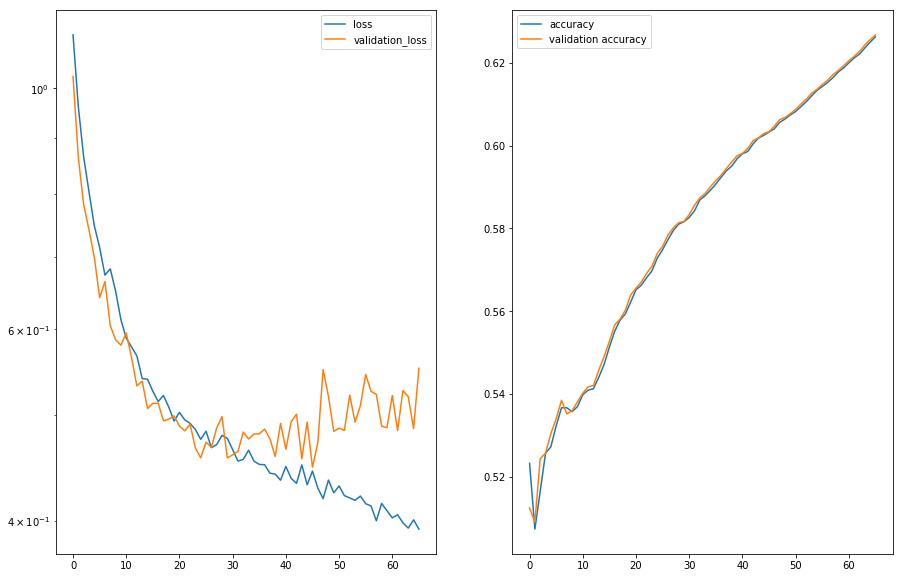

2701/2701 [==============================] - 5s 2ms/step - loss: 0.3930 - auc: 0.6263 - val_loss: 0.5526 - val_auc: 0.6268


In [589]:
count_epochs = 300
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
model = create_dnn_model()
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(np.array(X_train), np.array(y_train), batch_size = 128, epochs = count_epochs, verbose=1, validation_split=0.2, class_weight=class_weights, callbacks=[plot,early_stopping_monitor])

In [585]:
send_notify('Complete fit')

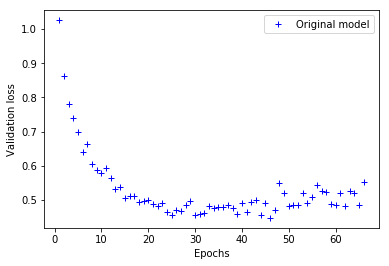

In [590]:
history_gr = history.history['val_loss']
epochs = range(1, len(history_gr) + 1)
import matplotlib.pyplot as plt

plt.plot(epochs, history_gr, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [587]:
predict = model.predict(np.array(X_test))
score = roc_auc_score(y_test, predict)
print("Total roc auc score = {0:0.4f}".format(score))

Total roc auc score = 0.5692


In [60]:
model_json = model.to_json()
# Записываем модель в файл
json_file = open("sale_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("sale_model.h5")

In [521]:
def save_predict(predict):
    with open('first.csv', 'w') as f:
        for item in predict:
            f.write("%s\n" % item[0])

In [522]:
save_predict(model.predict(np.array(X)))